   # Lab 2 - Encoding

____
____

# An Overview of Encoding Techniques
___
___

We are going to learn and try some of the most commonly used encoding techniques. We will also run and test each of these encoding techniques in a simple logistic regression model and finally observe the performance of each type of encoding.



    Method 1 : Label encoding
    Method 2 : OnHot encoding
    Method 3: Target Encoding


In [1]:
import pandas as pd

In [2]:
# read data
data = pd.read_csv('./clean_data.csv')

### Method 1: Label encoding

In this method we change every categorical data to a number. That means each type will be subtuted by a number.

For implementing this we will first import Labelencoder from sklearn module.

Encode target variable `State`.

In [3]:
data['State'].unique()

array(['CO', 'WA', 'AZ', 'TX', 'NM', 'OH', 'ID', 'MI', 'CA', 'NY', 'MA',
       'MN', 'IL', 'FL', 'VA', 'TN', 'MS', 'PA', 'WI', 'NV', 'IN', 'DC',
       'CT', 'OK', 'NJ', 'MD', 'NC', 'MO', 'GA', 'HI', 'ME', 'LA', 'OR',
       'KY', 'IA', 'NE', 'MT', 'UT', 'WY', 'SC', 'NH', 'ND', 'RI', 'KS',
       'WV', 'AK', 'AL', 'SD', 'AR', 'VT', 'DE'], dtype=object)

Now we will do these three steps to label encode our data:

+ Initialize the labelencoder class
+ Call the fit() method to fit the data
+ Transform data to labelencoded data


In [4]:
# make copy of the original data

df=data.copy()

In [5]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'State' as an example
df['State']= label_encoder.fit_transform(df['State'])
  
df['State'].unique()

array([ 5, 47,  3, 43, 32, 35, 13, 22,  4, 34, 19, 23, 14,  9, 45, 42, 25,
       38, 48, 33, 15,  7,  6, 36, 31, 20, 27, 24, 10, 11, 21, 18, 37, 17,
       12, 29, 26, 44, 50, 40, 30, 28, 39, 16, 49,  0,  1, 41,  2, 46,  8])

___
___

### Method 2 : One hot encoding

The second approach involves representing each category through one-hot encoding (OHE) vectors, also known as dummy variables. One-hot encoding is a technique that transforms each category value into a binary vector of size |i| (number of values in category i), where all columns are set to zero except for the column corresponding to the category. A visual representation is provided in the image below:

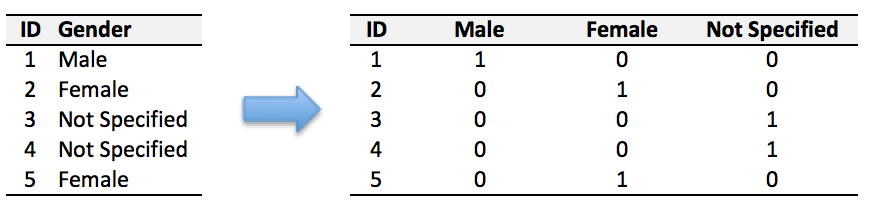

The output is generated as a pandas dataframe. Alternatively, the OneHotEncoder() method from the sklearn library can be employed to achieve one-hot encoding of the data. However, this method yields a sparse matrix. The benefit of this approach lies in its efficient utilization of minimal memory and CPU resources.

To implement this, follow these steps:

+ Import OneHotEncoder from sklearn.preprocessing.
+ Initialize the OneHotEncoder.
+ Fit and subsequently transform the data using the encoder.


In [6]:
df['LowDoc'].unique()

array(['N', 'Y'], dtype=object)

### In the next line: 

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

##### handle_unknown='ignore': 
This parameter specifies how the encoder should handle unknown categories (categories that were not seen during the fit phase). In this case, 'ignore' is set, which means that if there are unknown categories during the transformation (when applying the encoder to new data), it will not raise an error. Instead, it will handle them by assigning zeros to all columns corresponding to the unknown category.

##### sparse=False: 
This parameter determines whether the output should be a sparse matrix or a dense array. A sparse matrix is a memory-efficient representation, particularly useful when dealing with high-dimensional data with many zero values. However, in this case, sparse is set to False, meaning the output will be a dense array rather than a sparse matrix.

So, in summary, the OneHotEncoder is configured to ignore unknown categories during transformation, and it will produce a dense array as output.

In [7]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False) # keep sparse=False
OHE.fit(df[['MIS_Status']])
result = OHE.transform(df[['MIS_Status']])
OHE_columns = ['MIS_Status'+"_"+str(x) for x in OHE.categories_[0]]
result_train = pd.DataFrame(result, columns=OHE_columns)
df = pd.concat([df, result_train], axis=1)
df

C:\Users\morta\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,...,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,MIS_Status_CHGOFF,MIS_Status_P I F
0,BOULDER,5,80302,WELLS FARGO BANK NATL ASSOC,SD,327122,39,8,1.0,0,...,1,Y,N,60639.0,0.0,CHGOFF,30000.0,15000.0,1.0,0.0
1,SEATTLE,47,98101,HANMI BANK,CA,722211,15,2,1.0,0,...,1,0,N,66000.0,0.0,CHGOFF,66000.0,33000.0,1.0,0.0
2,PHOENIX,3,85023,CAPITAL ONE NATL ASSOC,VA,323119,62,15,1.0,0,...,1,N,N,50000.0,0.0,CHGOFF,50000.0,25000.0,1.0,0.0
3,HOUSTON,43,77074,JPMORGAN CHASE BANK NATL ASSOC,IL,524210,66,3,1.0,1,...,1,Y,N,168853.0,0.0,CHGOFF,50000.0,25000.0,1.0,0.0
4,LAS CRUCES,32,88001,BANK OF AMERICA NATL ASSOC,NM,0,60,1,2.0,0,...,0,N,N,26000.0,0.0,CHGOFF,26000.0,23400.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442499,HUNTINGTON BEACH,4,92649,WELLS FARGO BANK NATL ASSOC,SD,0,300,10,1.0,0,...,0,N,N,492000.0,0.0,P I F,492000.0,344400.0,0.0,1.0
442500,DOVER,30,3820,CITIZENS BANK NATL ASSOC,RI,812112,36,1,2.0,0,...,1,N,N,10000.0,0.0,P I F,10000.0,5000.0,0.0,1.0
442501,LUBBOCK,43,79423,PLAINSCAPITAL BANK,TX,611691,64,1,2.0,1,...,1,N,N,68000.0,0.0,P I F,68000.0,57800.0,0.0,1.0
442502,SULLIVAN,14,61951,FIRST MID-ILLINOIS BK & TRUST,IL,0,60,2,1.0,0,...,0,N,Y,23200.0,0.0,P I F,23200.0,18560.0,0.0,1.0


In [8]:
#drop the oroginal categorical columns
df=df.drop('MIS_Status',axis=1)
df

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status_CHGOFF,MIS_Status_P I F
0,BOULDER,5,80302,WELLS FARGO BANK NATL ASSOC,SD,327122,39,8,1.0,0,...,1,1,Y,N,60639.0,0.0,30000.0,15000.0,1.0,0.0
1,SEATTLE,47,98101,HANMI BANK,CA,722211,15,2,1.0,0,...,1,1,0,N,66000.0,0.0,66000.0,33000.0,1.0,0.0
2,PHOENIX,3,85023,CAPITAL ONE NATL ASSOC,VA,323119,62,15,1.0,0,...,1,1,N,N,50000.0,0.0,50000.0,25000.0,1.0,0.0
3,HOUSTON,43,77074,JPMORGAN CHASE BANK NATL ASSOC,IL,524210,66,3,1.0,1,...,0,1,Y,N,168853.0,0.0,50000.0,25000.0,1.0,0.0
4,LAS CRUCES,32,88001,BANK OF AMERICA NATL ASSOC,NM,0,60,1,2.0,0,...,0,0,N,N,26000.0,0.0,26000.0,23400.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442499,HUNTINGTON BEACH,4,92649,WELLS FARGO BANK NATL ASSOC,SD,0,300,10,1.0,0,...,1,0,N,N,492000.0,0.0,492000.0,344400.0,0.0,1.0
442500,DOVER,30,3820,CITIZENS BANK NATL ASSOC,RI,812112,36,1,2.0,0,...,0,1,N,N,10000.0,0.0,10000.0,5000.0,0.0,1.0
442501,LUBBOCK,43,79423,PLAINSCAPITAL BANK,TX,611691,64,1,2.0,1,...,52007,1,N,N,68000.0,0.0,68000.0,57800.0,0.0,1.0
442502,SULLIVAN,14,61951,FIRST MID-ILLINOIS BK & TRUST,IL,0,60,2,1.0,0,...,1,0,N,Y,23200.0,0.0,23200.0,18560.0,0.0,1.0


While one-hot encoding is a widely used technique for converting categorical variables into a format that can be provided to machine learning algorithms, it does have some limitations:

#### High Dimensionality:

Issue: One-hot encoding can lead to a significant increase in the dimensionality of the dataset, especially when dealing with categorical variables with a large number of unique values.
Consequence: The increase in dimensionality may result in computational challenges, increased memory requirements, and potential difficulties for algorithms that assume a lower-dimensional input space.
Curse of Dimensionality:

+ Issue: One-hot encoding can exacerbate the curse of dimensionality, where the data becomes more sparse in high-dimensional spaces.

+ Consequence: Sparse data can lead to overfitting, increased model complexity, and a greater need for more data to train models effectively.

#### Correlated Columns:

+ Issue: In cases where categorical variables exhibit a natural order or ranking, one-hot encoding may introduce multicollinearity.

+ Consequence: Multicollinearity can be problematic for some models, as it can make the interpretation of coefficients more challenging and may affect the stability of the model.

#### Loss of Information:

+ Issue: One-hot encoding transforms categorical variables into binary vectors, resulting in a loss of information about the inherent relationships between categories.

+ Consequence: Certain relationships or ordinal information might be valuable in certain contexts, but one-hot encoding treats all categories as independent.


#### Handling New Categories:

+ Issue: One-hot encoding during training assumes knowledge of all possible categories. Handling new categories in the test or production phase requires additional considerations.

+ Consequence: If new categories are encountered during testing or deployment, the model might struggle to handle them, and strategies like "handle_unknown" parameter in one-hot encoding need to be employed.

Despite these limitations, one-hot encoding remains a valuable and widely used technique. It's essential to consider these limitations in the context of the specific machine learning problem and choose encoding strategies accordingly. In some cases, alternative techniques like target encoding or embedding layers in neural networks might be considered to address these limitations.

___
___

### Method 3 : Target encoding

Target Encoding is also known as "likelihood encoding" or "mean encoding". It is basically, creating a new feature from existing features and the target variable. 

Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.



Here is an example

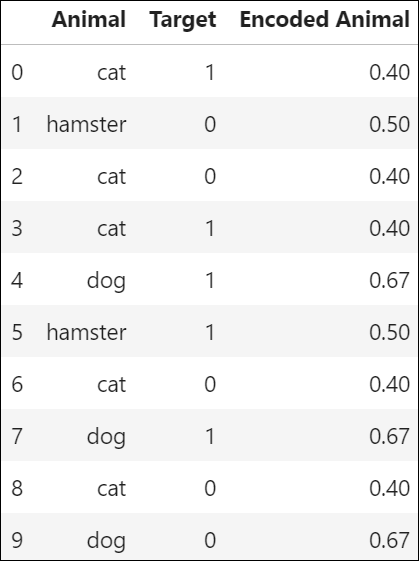

___
___
To gain a clearer understanding, let's delve into an example. Table 1 showcases categorical data in the 'Animal' column and our binary target in the 'Target' column. The last column contains the encoded animal values. How did we arrive at this encoding?

1. Initially, group the data by each category and tally the occurrences of each target, as demonstrated in Table 2.
2. Subsequently, compute the probability of Target 1 occurring for each distinct 'Animal Group.' This calculation yields the values presented in Table 2:

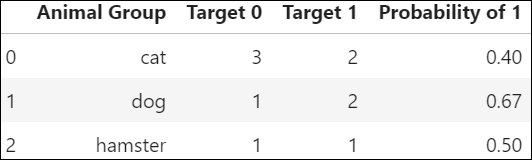

3. Finally, reintroduce the new column containing the probability values for each Animal Group. This is depicted in the initial dataframe (Table 1). Now, you possess a numerical representation of the 'Animal' feature that is compatible with machine learning algorithms.

It's important to note that when performing target encoding in scikit-learn, the resulting values may differ slightly from those obtained using the aforementioned methodology. This discrepancy arises because our approach solely considers the posterior probability. Scikit-learn, on the other hand, also incorporates the prior probability, representing the probability of the target being 1. In this instance, the prior probability is 0.5, as the target is equal to 1 half of the time. Scikit-learn utilizes this metric to smoothen the encoded value, preventing an excessive influence on the target-encoded feature that is contingent on the target.

+ Benefits of Target Encoding:

Target encoding is a straightforward and efficient encoding method that does not contribute to the dimensionality of the dataset. Consequently, it serves as a viable initial encoding method.

+ Limitations of Target Encoding:

Target encoding relies on the distribution of the target, necessitating meticulous validation to mitigate the risk of overfitting. Additionally, its effectiveness is dataset-specific, leading to notable improvements only in certain instances.

In [9]:
# ! pip install category_encoders

In [10]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

df['RevLineCr'] = encoder.fit_transform(df['RevLineCr'],df['SBA_Appv'])  # encoder.fit_transform(X,y): X: column to transfer, y: target column

df

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status_CHGOFF,MIS_Status_P I F
0,BOULDER,5,80302,WELLS FARGO BANK NATL ASSOC,SD,327122,39,8,1.0,0,...,1,1,34177.543656,N,60639.0,0.0,30000.0,15000.0,1.0,0.0
1,SEATTLE,47,98101,HANMI BANK,CA,722211,15,2,1.0,0,...,1,1,193179.785489,N,66000.0,0.0,66000.0,33000.0,1.0,0.0
2,PHOENIX,3,85023,CAPITAL ONE NATL ASSOC,VA,323119,62,15,1.0,0,...,1,1,182914.562358,N,50000.0,0.0,50000.0,25000.0,1.0,0.0
3,HOUSTON,43,77074,JPMORGAN CHASE BANK NATL ASSOC,IL,524210,66,3,1.0,1,...,0,1,34177.543656,N,168853.0,0.0,50000.0,25000.0,1.0,0.0
4,LAS CRUCES,32,88001,BANK OF AMERICA NATL ASSOC,NM,0,60,1,2.0,0,...,0,0,182914.562358,N,26000.0,0.0,26000.0,23400.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442499,HUNTINGTON BEACH,4,92649,WELLS FARGO BANK NATL ASSOC,SD,0,300,10,1.0,0,...,1,0,182914.562358,N,492000.0,0.0,492000.0,344400.0,0.0,1.0
442500,DOVER,30,3820,CITIZENS BANK NATL ASSOC,RI,812112,36,1,2.0,0,...,0,1,182914.562358,N,10000.0,0.0,10000.0,5000.0,0.0,1.0
442501,LUBBOCK,43,79423,PLAINSCAPITAL BANK,TX,611691,64,1,2.0,1,...,52007,1,182914.562358,N,68000.0,0.0,68000.0,57800.0,0.0,1.0
442502,SULLIVAN,14,61951,FIRST MID-ILLINOIS BK & TRUST,IL,0,60,2,1.0,0,...,1,0,182914.562358,Y,23200.0,0.0,23200.0,18560.0,0.0,1.0


See list of other Encoders in this link

https://contrib.scikit-learn.org/category_encoders/

#### DO NOT FORGET to drop original columns that are transfered to new columns

In [11]:
df=df.drop(columns=['Zip'])
df.head(5)

,City,State,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status_CHGOFF,MIS_Status_P I F
0,BOULDER,5,WELLS FARGO BANK NATL ASSOC,SD,327122,39,8,1.0,0,8,1,1,34177.543656,N,60639.0,0.0,30000.0,15000.0,1.0,0.0
1,SEATTLE,47,HANMI BANK,CA,722211,15,2,1.0,0,2,1,1,193179.785489,N,66000.0,0.0,66000.0,33000.0,1.0,0.0
2,PHOENIX,3,CAPITAL ONE NATL ASSOC,VA,323119,62,15,1.0,0,0,1,1,182914.562358,N,50000.0,0.0,50000.0,25000.0,1.0,0.0
3,HOUSTON,43,JPMORGAN CHASE BANK NATL ASSOC,IL,524210,66,3,1.0,1,3,0,1,34177.543656,N,168853.0,0.0,50000.0,25000.0,1.0,0.0
4,LAS CRUCES,32,BANK OF AMERICA NATL ASSOC,NM,0,60,1,2.0,0,0,0,0,182914.562358,N,26000.0,0.0,26000.0,23400.0,1.0,0.0


___
___

## What if we want to encode a clumn that has type is already number?

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.


Why to normalize prior to model fitting?

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

More here: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

___
___

Normalization and standardization are two different techniques used in data preprocessing, particularly in the context of machine learning and statistics. They are applied to scale or transform the features of a dataset. Here's a brief explanation of each:

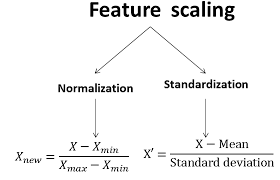

##### Normalization:

- Objective: The goal of normalization is to scale the values of different features to a standard range. Commonly, normalization brings values between 0 and 1. 
Formula: The normalized value (x') for a given data point x in a feature is calculated using the formula:


- Use cases: Normalization is particularly useful when the features in the dataset have different ranges and you want to ensure that they contribute equally to the analysis.


###### Standardization:

+ Objective: The goal of standardization is to transform the data to have a mean of 0 and a standard deviation of 1.
Formula: The standardized value (z) for a given data point x in a feature is calculated using the formula:

+ Use cases: Standardization is particularly useful when the features in the dataset have different units or when the machine learning algorithm used (e.g., support vector machines, k-means clustering) assumes that the data is standard normally distributed.


In summary, normalization and standardization are both techniques used to scale and transform features, but they differ in their specific objectives and the transformations applied. Normalization is about scaling features to a specific range, typically between 0 and 1, while standardization is about transforming the data to have a mean of 0 and a standard deviation of 1. The choice between normalization and standardization depends on the requirements of the specific machine learning algorithm and the characteristics of the dataset.

____

Use MinMax scaler to encode numerical variables. Be careful not to scale new columns you have created as part of categorical features encoding. 
Add new columns containing scaled values as "Original_name"_sc

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['NAICS']])
df['NAICS_cs'] = scaler.transform(df[['NAICS']])
df=df.drop(columns=['NAICS'])
df.head(5)

,City,State,Bank,BankState,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status_CHGOFF,MIS_Status_P I F,NAICS_cs
0,BOULDER,5,WELLS FARGO BANK NATL ASSOC,SD,39,8,1.0,0,8,1,1,34177.543656,N,60639.0,0.0,30000.0,15000.0,1.0,0.0,0.352457
1,SEATTLE,47,HANMI BANK,CA,15,2,1.0,0,2,1,1,193179.785489,N,66000.0,0.0,66000.0,33000.0,1.0,0.0,0.778144
2,PHOENIX,3,CAPITAL ONE NATL ASSOC,VA,62,15,1.0,0,0,1,1,182914.562358,N,50000.0,0.0,50000.0,25000.0,1.0,0.0,0.348144
3,HOUSTON,43,JPMORGAN CHASE BANK NATL ASSOC,IL,66,3,1.0,1,3,0,1,34177.543656,N,168853.0,0.0,50000.0,25000.0,1.0,0.0,0.564808
4,LAS CRUCES,32,BANK OF AMERICA NATL ASSOC,NM,60,1,2.0,0,0,0,0,182914.562358,N,26000.0,0.0,26000.0,23400.0,1.0,0.0,0.000000


if there is only two string value that we will convert to 0 and 1 and we prefer assign specific number to specific term then we use as follwoing. Normally is needed for Target column like our example here.


How many of the each target label are there? Target label is `MIS_Status` column. 

**Solution**:

In [13]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count()

MIS_Status
CHGOFF     77879
P I F     364625
Name: MIS_Status, dtype: int64

**Solution:**

In [14]:
# Converting target variable from string to binary
data['MIS_Status'] = [1 if app == 'CHGOFF' else 0 for app in data.MIS_Status.values]

In [15]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count()

MIS_Status
0    364625
1     77879
Name: MIS_Status, dtype: int64